In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('all_csv/All_in_one.csv')
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)
df

,message,channel_name,city
date,,,
2024-10-31 19:19:02,Ищем на подселение 1 девушку Квартира 3 комнат...,SDU [housing],Almaty
2024-10-31 18:32:46,Всем привет ищу 12 девочку к себе на подселени...,SDU [housing],Almaty
2024-10-31 18:23:14,Алма Сити 5 екы жыгыт ыздеймыз поселениеге 50к...,SDU [housing],Almaty
2024-10-31 17:43:32,СДУға жақын жерде орналасқан коттедж үй жалға ...,SDU [housing],Almaty
2024-10-31 16:42:10,ищем одну девушку на подселение в однокомнатну...,SDU [housing],Almaty
...,...,...,...
2024-09-19 11:59:23,Сниму квартиру в районе сахзаводана длительный...,ТАРАЗ КВАРТИРА ВРЕМЯНКА ДОМ СДАМ СНИМУ ПОДСЕЛЕНИЕ,Taraz
2024-09-19 11:45:18,Подселение в 2х комнатную кв Проживание с ХОЗЯ...,ТАРАЗ КВАРТИРА ВРЕМЯНКА ДОМ СДАМ СНИМУ ПОДСЕЛЕНИЕ,Taraz
2024-09-08 22:21:26,Здравствуйтепомогу с поиском квартиры по вашем...,ТАРАЗ КВАРТИРА ВРЕМЯНКА ДОМ СДАМ СНИМУ ПОДСЕЛЕНИЕ,Taraz


In [ ]:
city_counts = df['city'].value_counts()
print("City-wise announcement counts:\n", city_counts)


City-wise announcement counts:
 city
Almaty         46520
Astana         18086
Shymkent        3367
Atyrau          3345
Oral             236
Taraz             12
Taldykorgan        5
Name: count, dtype: int64


In [ ]:
# 2. Seasonal Analysis
df['season'] = df.index.month % 12 // 3 + 1  
season_counts = df['season'].value_counts().sort_index()
season_counts.index = ['Winter', 'Spring', 'Summer', 'Fall']
print("\nSeasonal announcement counts:\n", season_counts)



Seasonal announcement counts:
 Winter    13893
Spring    15298
Summer    22103
Fall      20277
Name: count, dtype: int64


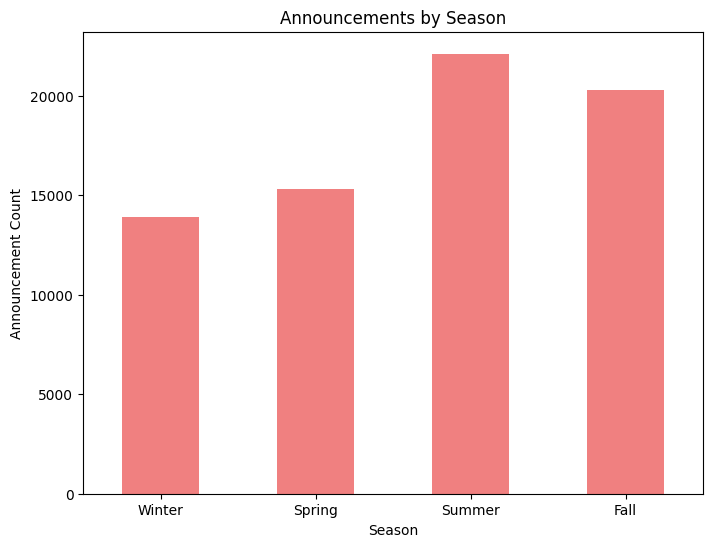

In [10]:
# Plotting seasonal announcement counts
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='lightcoral')
plt.title("Announcements by Season")
plt.xlabel("Season")
plt.ylabel("Announcement Count")
plt.xticks(rotation=0)
plt.show()

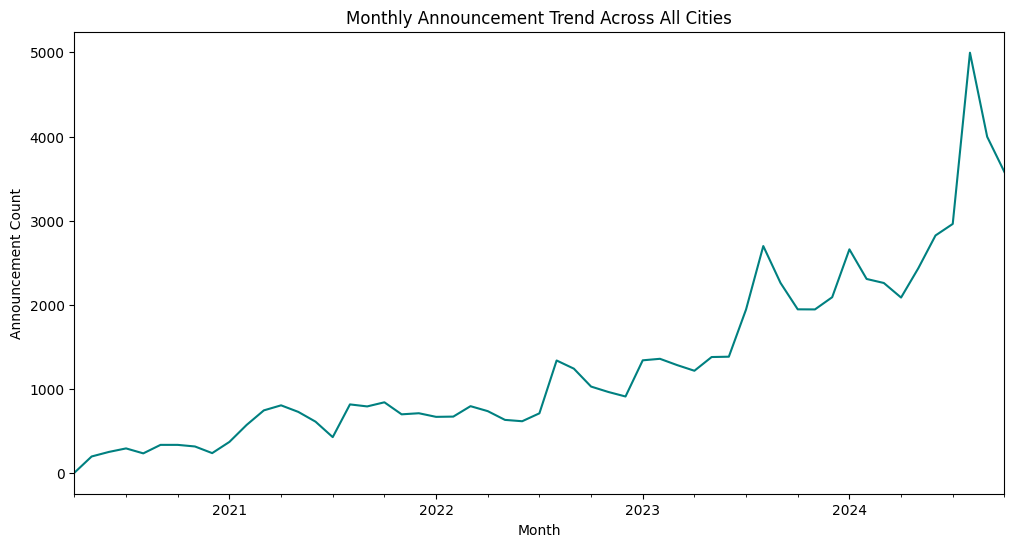

In [ ]:
# 3. Monthly announcement trend across all cities
monthly_counts_all = df.resample('M').size()

plt.figure(figsize=(12, 6))
monthly_counts_all.plot(color='teal')
plt.title("Monthly Announcement Trend Across All Cities")
plt.xlabel("Month")
plt.ylabel("Announcement Count")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21096\3960796357.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_sorted = df.groupby(['day_of_week', 'hour']).size().unstack()


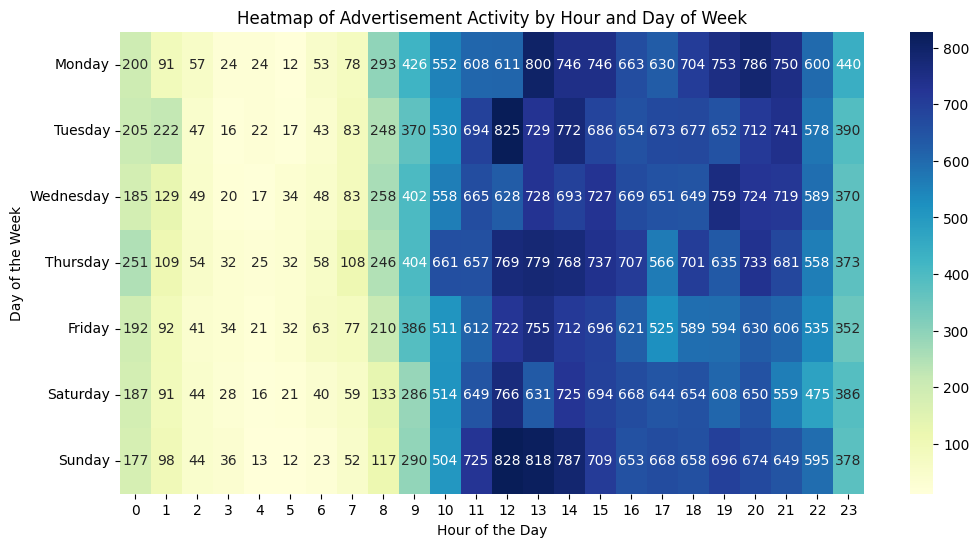

In [16]:
# Re-create 'hour' and 'day_of_week' columns in case they were not added
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_name()

# Set 'day_of_week' with a specific weekday order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Generate heatmap data with sorted days
heatmap_data_sorted = df.groupby(['day_of_week', 'hour']).size().unstack()

# Plot heatmap with days in order from Monday to Sunday
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_sorted, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Advertisement Activity by Hour and Day of Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

<Figure size 1400x1000 with 0 Axes>

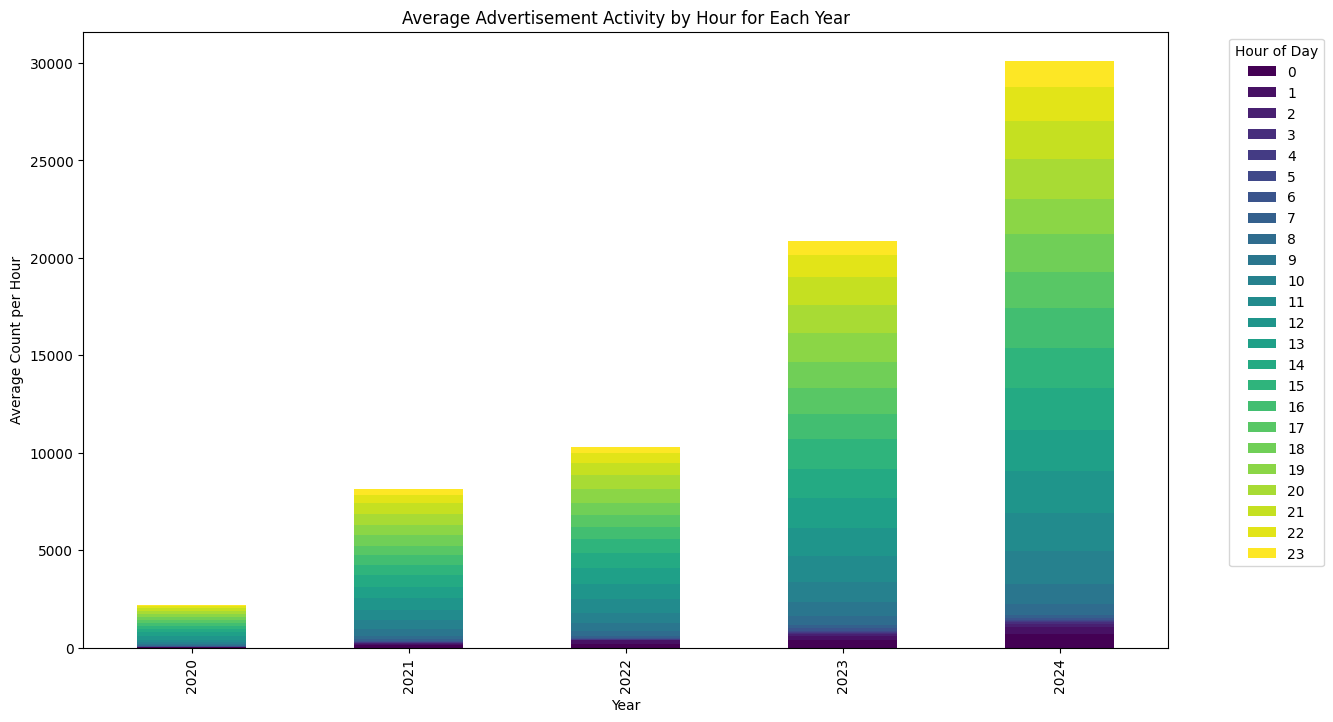

In [18]:
df['hour'] = df.index.hour
df['year'] = df.index.year

# Group by 'year' and 'hour' to get the average count per hour for each year
year_hour_avg = df.groupby(['year', 'hour']).size().unstack()

# Plotting bar charts for each year
plt.figure(figsize=(14, 10))
year_hour_avg.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title("Average Advertisement Activity by Hour for Each Year")
plt.xlabel("Year")
plt.ylabel("Average Count per Hour")
plt.legend(title='Hour of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
